## **Evaluation Metrics for Classification**

In the previous session we trained a model for predicting churn. How do we know if it's good?

### **1. Evaluation Metrics: Session Overview**

- Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
- https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

Metric - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
!wget $data

--2023-10-08 23:37:42--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: 'data_week_3.csv'

     0K .......... .......... .......... .......... ..........  5%  830K 1s
    50K .......... .......... .......... .......... .......... 10%  717K 1s
   100K .......... .......... .......... .......... .......... 15% 3.18M 1s
   150K .......... .......... .......... .......... .......... 20%  813K 1s
   200K .......... .......... .......... .......... .......... 26%  625K 1s
   250K .......... .......... .......... .......... .......... 31%  999K 1s
   300K .......... .......... .......... ....

In [4]:
df = pd.read_csv('data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# standarize columns by lower case and using underscore
df.columns = df.columns.str.lower().str.replace(" ", "_")

# standarize the value of categorical columns by lower case and using underscore
categorical_columns = list(df.dtypes[df.dtypes == "object"].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ", "_")

In [6]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [9]:
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [10]:
df[df['totalcharges'].isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,NaN
753,3115-czmzd,NaN
936,5709-lvoeq,NaN
1082,4367-nuyao,NaN
1340,1371-dwpaz,NaN
3331,7644-omvmy,NaN
3826,3213-vvolg,NaN
4380,2520-sgtta,NaN
5218,2923-arzlg,NaN
6670,4075-wkniu,NaN


In [11]:
df['totalcharges'] = df['totalcharges'].fillna(0)
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [12]:
df['churn'].head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [13]:
df['churn'] = (df['churn'] == 'yes').astype(int)
df['churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [15]:
len(df_full_train), len(df_test)

(5634, 1409)

In [16]:
# The test size is 0.25 derived from 20%(val)/80%(full_train) since the validation distribution is 20% of full dataset
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [17]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

In [20]:
df_train = df_train.drop(columns='churn')
df_val = df_val.drop(columns='churn')
df_test = df_test.drop(columns='churn')

In [21]:
numerical_vars = ['tenure', 'monthlycharges', 'totalcharges']
categorical_vars = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [22]:
df[categorical_vars].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [23]:
ohe_train = pd.get_dummies(df_train[categorical_vars], columns=categorical_vars).astype('int')
X_train = pd.concat([ohe_train, df_train[numerical_vars]], axis=1)
X_train.head()

,gender_female,gender_male,seniorcitizen_0,seniorcitizen_1,partner_no,partner_yes,dependents_no,dependents_yes,phoneservice_no,phoneservice_yes,...,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check,tenure,monthlycharges,totalcharges
0,1,0,1,0,0,1,0,1,0,1,...,1,0,1,0,0,1,0,72,115.50,8425.15
1,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,10,95.25,1021.55
2,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,5,75.55,413.65
3,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,5,80.85,356.10
4,1,0,1,0,0,1,1,0,0,1,...,1,1,0,0,0,0,1,18,20.10,370.50


In [24]:
ohe_val = pd.get_dummies(df_val[categorical_vars], columns=categorical_vars).astype('int')
X_val = pd.concat([ohe_val, df_val[numerical_vars]], axis=1)
X_val.head()

,gender_female,gender_male,seniorcitizen_0,seniorcitizen_1,partner_no,partner_yes,dependents_no,dependents_yes,phoneservice_no,phoneservice_yes,...,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check,tenure,monthlycharges,totalcharges
0,0,1,1,0,0,1,0,1,0,1,...,1,0,1,0,1,0,0,71,70.85,4973.40
1,0,1,1,0,1,0,0,1,0,1,...,0,1,0,0,0,0,1,1,20.75,20.75
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,1,1,20.35,20.35
3,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,2,75.70,189.20
4,1,0,1,0,1,0,1,0,0,1,...,0,1,0,1,0,0,0,1,19.90,19.90


In [25]:
ohe_test = pd.get_dummies(df_test[categorical_vars], columns=categorical_vars).astype('int')
X_test = pd.concat([ohe_test, df_test[numerical_vars]], axis=1)
X_test.head()

,gender_female,gender_male,seniorcitizen_0,seniorcitizen_1,partner_no,partner_yes,dependents_no,dependents_yes,phoneservice_no,phoneservice_yes,...,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check,tenure,monthlycharges,totalcharges
0,1,0,1,0,1,0,1,0,0,1,...,0,0,1,1,0,0,0,41,79.85,3320.75
1,1,0,0,1,1,0,1,0,0,1,...,1,0,1,1,0,0,0,66,102.40,6471.85
2,1,0,1,0,1,0,1,0,0,1,...,0,0,1,1,0,0,0,12,45.00,524.35
3,1,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,5,50.60,249.95
4,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,0,1,10,65.90,660.05


In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00846646, 0.1955183 , 0.20487698, ..., 0.14667913, 0.7829082 ,
       0.81492256])

In [28]:
churn_decision = (y_pred >= 0.5)

In [29]:
(churn_decision == y_val).mean()

0.8026969481902059

### **2. Accuracy and Dummy Model**

- Evaluate the model on different thresholds
- Check the accuracy of dummy baselines

In [30]:
len(y_val)

1409

In [31]:
(churn_decision == y_val).sum()

1131

In [32]:
1132/1409

0.8034066713981547

In [33]:
(churn_decision == y_val).mean()

0.8026969481902059

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_val, y_pred >= 0.5)

0.8026969481902059

In [36]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.510
0.10 0.596
0.15 0.664
0.20 0.713
0.25 0.741
0.30 0.757
0.35 0.769
0.40 0.781
0.45 0.791
0.50 0.803
0.55 0.799
0.60 0.793
0.65 0.783
0.70 0.767
0.75 0.742
0.80 0.729
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


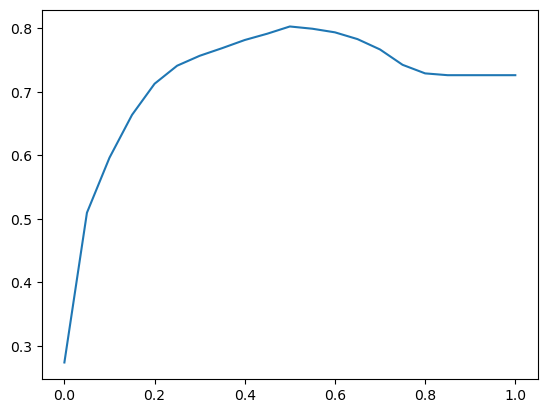

In [37]:
plt.plot(thresholds, scores)

In [38]:
from collections import Counter

In [39]:
Counter(y_pred >= 1)

Counter({False: 1409})

In [40]:
# check the distribution of y_val
print("Not Churned: %.2f" % (1 - y_val.mean()))
print("Churned: %.2f" % y_val.mean())

Not Churned: 0.73
Churned: 0.27


Note that if we build a dummy model in which the decision cutoff is 1, so the algorithm predicts that no clients will churn, the accuracy would be 73%. Thus, we can see that the improvement of the original model with respect to the dummy model is not as high as we would expect.

Therefore, in this problem accuracy can not tell us how good is the model because the dataset is unbalanced, which means that there are more instances from one category than the other. This is also known as class imbalance.

### **3. Confusion Table**

- Different types of errors and correct decisions
- Arranging them in a table

In [41]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0 )

In [42]:
predict_positive = (y_pred >= 0.5)
predict_negative = (y_pred < 0.5)

In [43]:
tp = (actual_positive & predict_positive).sum()
tn = (actual_negative & predict_negative).sum()

In [44]:
tp, tn

(213, 918)

In [45]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [46]:
fp, fn

(105, 173)

In [47]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[918, 105],
       [173, 213]])

In [48]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

### **4. Precision & Recall**

In [49]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.8026969481902059

In [50]:
precision = tp / (tp + fp)
precision

0.6698113207547169

In [51]:
print("%.2f" % (1-precision), "% we wrongly sent a promotional voucher to customers who are actually not churning")

0.33 % we wrongly sent a promotional voucher to customers who are actually not churning


In [52]:
recall = tp / (tp + fn)
recall

0.5518134715025906

In [53]:
print("%.2f" % (1-recall), "% we failed to identify the customers who are actually churning")

0.45 % we failed to identify the customers who are actually churning


### **5. ROC Curves**

**TRP and FRP**

In [54]:
tpr = tp / (tp + fn)
tpr

0.5518134715025906

In [55]:
fpr = fp / (fp + tn)
fpr

0.10263929618768329

In [56]:
thresholds = np.linspace(0, 1, 101)
scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0 )
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    scores.append((t, tp, fp, tn, fn))

In [57]:
columns = ['t', 'tp', 'fp', 'tn', 'fn']
df_scores = pd.DataFrame(scores, columns=columns)

In [58]:
df_scores['tpr'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
df_scores['fpr'] = df_scores['fp'] / (df_scores['tn'] + df_scores['fp'])

In [59]:
df_scores[::10]

,t,tp,fp,tn,fn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,367,550,473,19,0.950777,0.537634
20,0.2,334,353,670,52,0.865285,0.345064
30,0.3,286,243,780,100,0.740933,0.237537
40,0.4,251,173,850,135,0.650259,0.169110
50,0.5,213,105,918,173,0.551813,0.102639
60,0.6,148,53,970,238,0.383420,0.051808
70,0.7,70,13,1010,316,0.181347,0.012708
80,0.8,4,0,1023,382,0.010363,0.000000
90,0.9,0,0,1023,386,0.000000,0.000000


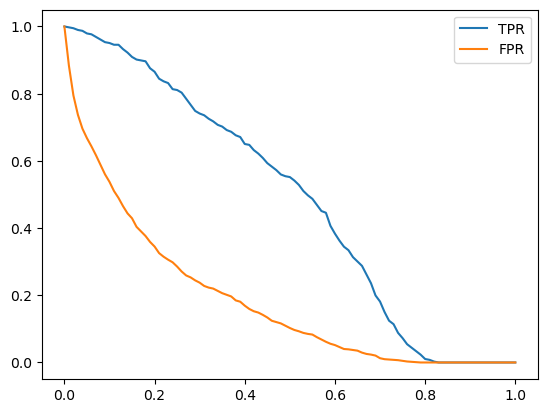

In [60]:
plt.plot(df_scores['t'], df_scores['tpr'], label='TPR')
plt.plot(df_scores['t'], df_scores['fpr'], label='FPR')
plt.legend()

**Random Model**

In [61]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [62]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [63]:
def tpr_for_dataframe(y_val, y_pred):
    thresholds = np.linspace(0, 1, 101)
    scores = []

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0 )
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        tp = (actual_positive & predict_positive).sum()
        tn = (actual_negative & predict_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        scores.append((t, tp, fp, tn, fn))
    
    columns = ['t', 'tp', 'fp', 'tn', 'fn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
    df_scores['fpr'] = df_scores['fp'] / (df_scores['tn'] + df_scores['fp'])

    return df_scores

In [64]:
df_rand = tpr_for_dataframe(y_val, y_rand)

In [65]:
df_rand[::10]

,t,tp,fp,tn,fn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,100,39,0.898964,0.902248
20,0.2,307,822,201,79,0.795337,0.803519
30,0.3,276,724,299,110,0.715026,0.707722
40,0.4,237,624,399,149,0.613990,0.609971
50,0.5,202,518,505,184,0.523316,0.506354
60,0.6,161,409,614,225,0.417098,0.399804
70,0.7,121,302,721,265,0.313472,0.295210
80,0.8,78,206,817,308,0.202073,0.201369
90,0.9,40,101,922,346,0.103627,0.098729


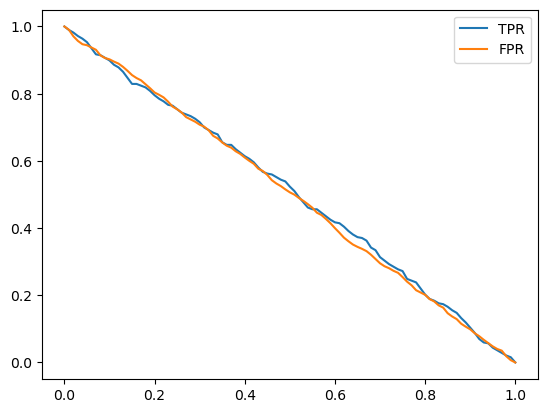

In [66]:
plt.plot(df_rand['t'], df_rand['tpr'], label='TPR')
plt.plot(df_rand['t'], df_rand['fpr'], label='FPR')
plt.legend()

**Ideal Model**

In [67]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [68]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [69]:
1 - y_val.mean()

0.7260468417317246

In [70]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

1.0

In [71]:
df_ideal = tpr_for_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,t,tp,fp,tn,fn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,141,0,1.000000,0.862170
20,0.2,386,741,282,0,1.000000,0.724340
30,0.3,386,600,423,0,1.000000,0.586510
40,0.4,386,459,564,0,1.000000,0.448680
50,0.5,386,319,704,0,1.000000,0.311828
60,0.6,386,178,845,0,1.000000,0.173998
70,0.7,386,37,986,0,1.000000,0.036168
80,0.8,282,0,1023,104,0.730570,0.000000
90,0.9,141,0,1023,245,0.365285,0.000000


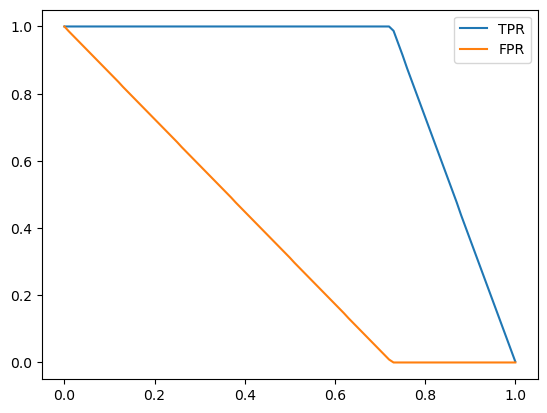

In [72]:
plt.plot(df_ideal['t'], df_ideal['tpr'], label='TPR')
plt.plot(df_ideal['t'], df_ideal['fpr'], label='FPR')
plt.legend()

**Putting everything together**

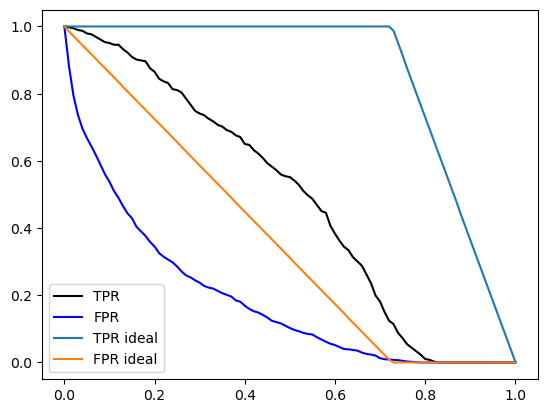

In [73]:
plt.plot(df_scores['t'], df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores['t'], df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal['t'], df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal['t'], df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()

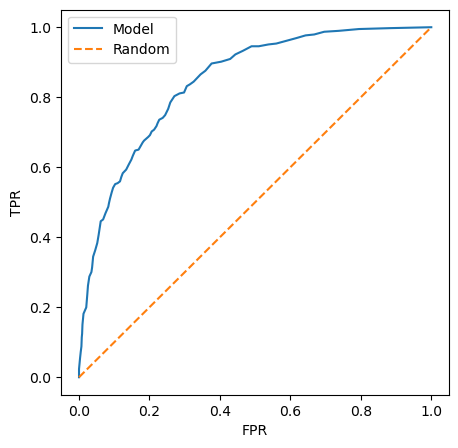

In [74]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores['fpr'], df_scores['tpr'], label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [75]:
from sklearn.metrics import roc_curve

In [76]:
fpr, tpr, t = roc_curve(y_val, y_pred)

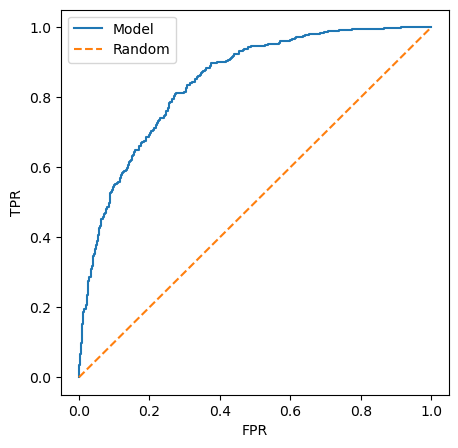

In [77]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

### **6. ROC AUC**

- Area under the ROC curve - useful metric
- Interpretation of AUC

In [78]:
from sklearn.metrics import auc

In [79]:
auc(fpr, tpr)

0.8446330258966059

In [80]:
auc(df_scores['fpr'], df_scores['tpr'])

0.8444342303192378

In [81]:
auc(df_ideal['fpr'], df_ideal['tpr'])

0.9999430203759136

In [82]:
fpr, tpr, t = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8446330258966059

In [83]:
from sklearn.metrics import roc_auc_score

In [84]:
roc_auc_score(y_val, y_pred)

0.8446330258966059

In [85]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [86]:
import random

In [87]:
n = 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success/n

0.84526

In [88]:
n = 50000
np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.84678

### **7. Cross Validation**

- Evaluating the same model on different subsets of data
- Getting the average prediction and the spread within predictions

In [89]:
def train(df_train, y_train, C=1):
    ohe_train = pd.get_dummies(df_train[categorical_vars], columns=categorical_vars).astype('int')
    X_train = pd.concat([ohe_train, df_train[numerical_vars]], axis=1)

    model = LogisticRegression(C=C,  max_iter=1000)
    model.fit(X_train, y_train)
    return model

In [90]:
model = train(df_train, y_train)

In [91]:
def predict(df, model):
    ohe = pd.get_dummies(df[categorical_vars], columns=categorical_vars).astype('int')
    X = pd.concat([ohe, df[numerical_vars]], axis=1)

    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [92]:
y_pred = predict(df_val, model)
y_pred

array([0.00771662, 0.20777483, 0.22208244, ..., 0.1501982 , 0.78229391,
       0.81144277])

In [93]:
from sklearn.model_selection import KFold

In [94]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [95]:
from tqdm.auto import tqdm

In [96]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train['churn'].values
        y_val = df_val['churn'].values

        model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.008
C=0.1 0.840 +- 0.008
C=0.5 0.841 +- 0.007
C=1 0.840 +- 0.008
C=5 0.840 +- 0.008
C=10 0.841 +- 0.007


In [97]:
model = train(df_full_train, df_full_train['churn'].values, C=0.5)
y_pred = predict(df_test, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8585332098324071

### **8. Summary**

- Metric - a single number that describes the performance of a model
- Accuracy - fraction of correct answers; sometimes misleading
- Precision and recall are less misleading when we have class inbalance
- ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance
- K-Fold CV - more reliable estimate for performance (mean + std)

### **9. Explore More**

- Check the precision and recall of the dummy classifier that always predict "FALSE"
- F1 score = 2 * P * R / (P + R)
- Evaluate precision and recall at different thresholds, plot P vs R - this way you'll get the precision/recall curve (similar to ROC curve)
- Area under the PR curve is also a useful metric

Other projects:
- Calculate the metrics for datasets from the previous week